In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
%tensorflow_version 2.x

# **改變的地方**
  * filter依序改用10、20、30個
  * 神經元改用36個
  * lr改用0.042
  * batch_size改用256
  * epochs改用10

# **讀入 Fashion MNIST 數據集**

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# **欣賞數據集內容**

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

這個東西是: Bag


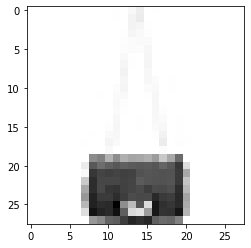

In [6]:
n = 4752
print("這個東西是: "+class_names[y_train[n]])
plt.imshow(x_train[n], cmap="Greys");

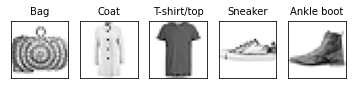

In [7]:
pick = np.random.choice(60000, 5, replace=False)
for i in range(5):
  n = pick[i]
  ax = plt.subplot(151+i)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(class_names[y_train[n]], fontsize=10)
  plt.imshow(x_train[n], cmap="Greys")

# **資料整理**

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)/255

In [0]:
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)

In [0]:
y_test = to_categorical(y_test, 10)

# **讀入必要的函式**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# **Step1:打造函數學習機(CNN)**

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(10, (5,5), padding='same', input_shape=(28, 28, 1), activation='relu')) ###這裡用10個fliter
model.add(MaxPooling2D(pool_size=(2,2))) ###變成(14,14,10)
model.add(Conv2D(20, (5,5), padding='same', activation='relu')) ###這裡用20個filter
model.add(MaxPooling2D(pool_size=(2,2))) ###變成(7,7,20)
model.add(Conv2D(30, (5,5), padding='same', activation='relu')) ###這裡用30個filter
model.add(MaxPooling2D(pool_size=(2,2))) ###變成(3,3,30)
model.add(Flatten())
model.add(Dense(36, activation='relu')) ###這裡用36個神經元
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 20)        5020      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 30)          15030     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 270)               0

In [19]:
(5*5+1)*10 ###算值

260

In [20]:
(5*5*10+1)*20 ###算值

5020

In [21]:
(5*5*20+1)*30 ###算值

15030

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.042), metrics=['accuracy']) ###這裡lr改成0.042

# **Step2:fit**

In [23]:
model.fit(x_train, y_train, batch_size=256, epochs=10) ###這裡batch_size改成256,epochs改成10

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0897 - accuracy: 0.2044
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0892 - accuracy: 0.2310
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0885 - accuracy: 0.2851
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0870 - accuracy: 0.3998
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0831 - accuracy: 0.4802
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.5163
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0545 - accuracy: 0.6282
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0446 - accuracy: 0.6777
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0410 - accuracy: 0.7020
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.7163

# **Step3:預測**

In [24]:
result = model.predict_classes(x_test)
def my_predict(n):
  print("我帥氣的CNN預測是: ",class_names[result[n]])
  X = x_test[n].reshape(28,28)
  plt.imshow(X, cmap='Greys')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


我帥氣的CNN預測是:  Trouser


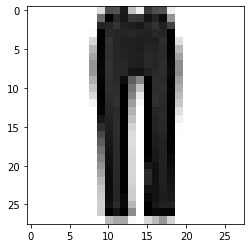

In [25]:
my_predict(6161)

In [0]:
from ipywidgets import interact_manual

In [27]:
interact_manual(my_predict, n=(0,9999));

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

In [28]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.7220


In [29]:
loss, acc = score
print("這次CNN訓練的正確率是: {}%".format(acc*100))

這次CNN訓練的正確率是: 72.2000002861023%
